In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
dtree=DecisionTreeRegressor()
rfr=RandomForestRegressor()
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

In [116]:
def adjusted_r2(r2,X_train):
    return 1-((1-r2**2)*(X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))

In [117]:
data=pd.read_csv("C:\\Users\\Karan\\Desktop\\Data\\AirBnB Stocks.csv")
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-12-11,146.550003,151.500000,135.100006,139.250000,139.250000,26980800
1,2020-12-14,135.000000,135.300003,125.160004,130.000000,130.000000,16966100
2,2020-12-15,126.690002,127.599998,121.500000,124.800003,124.800003,10914400
3,2020-12-16,125.830002,142.000000,124.910004,137.990005,137.990005,20409600
4,2020-12-17,143.000000,152.449997,142.669998,147.050003,147.050003,15054700
...,...,...,...,...,...,...,...
449,2022-09-26,101.779999,105.360001,101.559998,103.230003,103.230003,5278800
450,2022-09-27,106.040001,108.169998,104.139999,106.370003,106.370003,5081000
451,2022-09-28,106.700996,111.129997,105.779999,110.690002,110.690002,4518200
452,2022-09-29,109.190002,109.474998,105.169998,106.660004,106.660004,4259500


In [118]:
data["Date"]=pd.to_datetime(data["Date"])
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-12-11,146.550003,151.500000,135.100006,139.250000,139.250000,26980800
1,2020-12-14,135.000000,135.300003,125.160004,130.000000,130.000000,16966100
2,2020-12-15,126.690002,127.599998,121.500000,124.800003,124.800003,10914400
3,2020-12-16,125.830002,142.000000,124.910004,137.990005,137.990005,20409600
4,2020-12-17,143.000000,152.449997,142.669998,147.050003,147.050003,15054700
...,...,...,...,...,...,...,...
449,2022-09-26,101.779999,105.360001,101.559998,103.230003,103.230003,5278800
450,2022-09-27,106.040001,108.169998,104.139999,106.370003,106.370003,5081000
451,2022-09-28,106.700996,111.129997,105.779999,110.690002,110.690002,4518200
452,2022-09-29,109.190002,109.474998,105.169998,106.660004,106.660004,4259500


In [119]:
data["Year"]=data["Date"].dt.year
data["Month"]=data["Date"].dt.month
data["Day"]=data["Date"].dt.day
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
0,2020-12-11,146.550003,151.500000,135.100006,139.250000,139.250000,26980800,2020,12,11
1,2020-12-14,135.000000,135.300003,125.160004,130.000000,130.000000,16966100,2020,12,14
2,2020-12-15,126.690002,127.599998,121.500000,124.800003,124.800003,10914400,2020,12,15
3,2020-12-16,125.830002,142.000000,124.910004,137.990005,137.990005,20409600,2020,12,16
4,2020-12-17,143.000000,152.449997,142.669998,147.050003,147.050003,15054700,2020,12,17


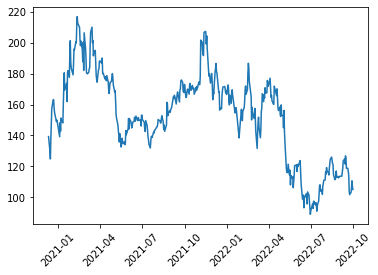

In [120]:
plt.plot(data["Date"],data["Close"])
plt.xticks(rotation=45);

In [121]:
n_data=data.set_index("Date")

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
0,2020-12-11,146.550003,151.500000,135.100006,139.250000,139.250000,26980800,2020,12,11
1,2020-12-14,135.000000,135.300003,125.160004,130.000000,130.000000,16966100,2020,12,14
2,2020-12-15,126.690002,127.599998,121.500000,124.800003,124.800003,10914400,2020,12,15
3,2020-12-16,125.830002,142.000000,124.910004,137.990005,137.990005,20409600,2020,12,16
4,2020-12-17,143.000000,152.449997,142.669998,147.050003,147.050003,15054700,2020,12,17
...,...,...,...,...,...,...,...,...,...,...
449,2022-09-26,101.779999,105.360001,101.559998,103.230003,103.230003,5278800,2022,9,26
450,2022-09-27,106.040001,108.169998,104.139999,106.370003,106.370003,5081000,2022,9,27
451,2022-09-28,106.700996,111.129997,105.779999,110.690002,110.690002,4518200,2022,9,28
452,2022-09-29,109.190002,109.474998,105.169998,106.660004,106.660004,4259500,2022,9,29


In [125]:
X=n_data.drop("Close",axis=1)
X
y=n_data["Close"]
y

Date
2020-12-11    139.250000
2020-12-14    130.000000
2020-12-15    124.800003
2020-12-16    137.990005
2020-12-17    147.050003
                 ...    
2022-09-26    103.230003
2022-09-27    106.370003
2022-09-28    110.690002
2022-09-29    106.660004
2022-09-30    105.040001
Name: Close, Length: 454, dtype: float64

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Regressor

In [127]:
dtree.fit(X_train,y_train)
y_pred=dtree.predict(X_test)
print("MAE: ",mean_absolute_error(y_test,y_pred))
print("MSE: ",mean_squared_error(y_test,y_pred))
r2=r2_score(y_test,y_pred)
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2 Score: ",r2)
print("Adjusted R2 Score: ",adjusted_r2(r2,X_train))

MAE:  0.489779571428573
MSE:  0.5388300257462756
RMSE:  0.7340504245256423
R2 Score:  0.999365748992255
Adjusted R2 Score:  0.998703242637582


# Random Forest Regressor

In [128]:
rfr.fit(X_train,y_train)
rfr_pred=rfr.predict(X_test)

print("MAE: ",mean_absolute_error(y_test,rfr_pred))
print("MSE: ",mean_squared_error(y_test,rfr_pred))
r2=r2_score(y_test,rfr_pred)
print("RMSE: ",np.sqrt(mean_squared_error(y_test,rfr_pred)))
print("R2 Score: ",r2)
print("Adjusted R2 Score: ",adjusted_r2(r2,X_train))

MAE:  0.3162976629670242
MSE:  0.3060648739521349
RMSE:  0.5532313023972296
R2 Score:  0.9996397343402113
Adjusted R2 Score:  0.9992633182112431


# Visualize Random Forest Regressor

In [131]:
pred=rfr.predict(X)
pred
y_pred_df=pd.DataFrame(pred,columns=["Close_predict"])
y_pred_df
data=pd.concat([data,y_pred_df],axis=1)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Close_predict
0,2020-12-11,146.550003,151.500000,135.100006,139.250000,139.250000,26980800,2020,12,11,139.120698
1,2020-12-14,135.000000,135.300003,125.160004,130.000000,130.000000,16966100,2020,12,14,130.481501
2,2020-12-15,126.690002,127.599998,121.500000,124.800003,124.800003,10914400,2020,12,15,125.247502
3,2020-12-16,125.830002,142.000000,124.910004,137.990005,137.990005,20409600,2020,12,16,136.949004
4,2020-12-17,143.000000,152.449997,142.669998,147.050003,147.050003,15054700,2020,12,17,146.975802


In [134]:
Date=data["Date"]
Close=data["Close"]
Close2=data["Close_predict"]

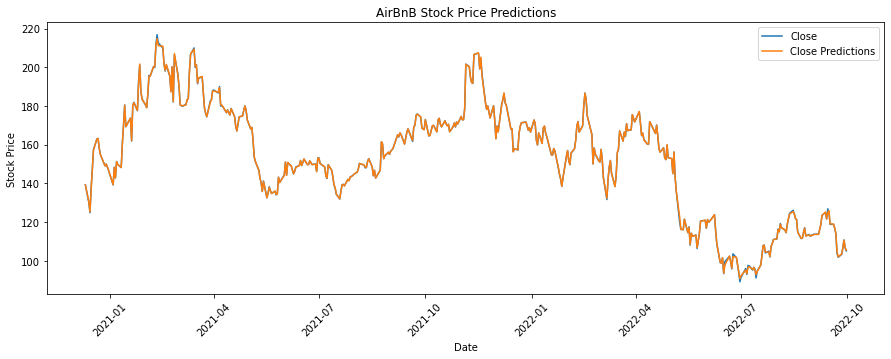

In [145]:
plt.figure(figsize=(15,5))
plt.plot(Date,Close,label="Close")
plt.plot(Date,Close2,label="Close Predictions")
plt.title("AirBnB Stock Price Predictions");
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend(loc="upper right")
plt.xticks(rotation=45);